# C0TB1060 蒲原紳乃輔

# 課題レポート
今回扱うテーマは \
1. データの分離を統計的なアイデアに基づき行う。
2. 3次元プロットによるデータの可視化

## データの分離を統計的なアイデアに基づき行う

### 理論の説明
scikit-learnのデータセットであるirisデータを正解ラベル毎に色分けしてプロットしてみるとなんだか分離できそうであった。これをアルゴリズム処理を用いて全データを正しく分離できるように頑張ってみる

データを線形分離する上で、傾きと切片を表すパラメータを持つベクトル（重みという）を定義する。元の特徴量データと重みの内積をとる。その結果、データ数分だけの一次元データが生成される。この状態ではそれぞれの成分の値がどのような意味をもつかわかりにくい。そこで、すべての入力に対して0 から1の値を返す特別な関数(sigmoid関数という）を作用させる。0から1は統計学では確率を表すものである。2値問題の場合は確率が0.5より大きい場合には片方の値を返し、それ以外はもう片方の値を返すようにする。

X = [データ数,2]の行列 \
重みw = [2,1]の行列 \
内積 X・W = [データ数,1]の行列 \

sigmoid function = 1/(1 + exp(-x)) を以下用いる \

次に、重みをどうやって正確に近づけていくか問題であるが、機械学習アルゴリズムでは一般的に予測ラベルと正解ラベルの偏差を表す損失関数を最小化することで重みを更新する。

w =: w - lr*grad(J) \
w: 重み \
lr: 学習率(ハイパーパラメータ)
J: コスト関数 \
grad : n変数関数の変数の個数分だけの微分係数成分をもつベクトル

### 実装
以下で実装を行う

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class LogisticRegression(object):
  def __init__(self,lr):
    self.lr = lr
    #重みの初期化をガウス分布で行う
    np.random.seed(seed=32)
    self.w = np.random.normal((2,1))
    #バイアス項を追加する
    self.b = np.zeros([x.shape[0],1])
  
  def fit(self,x,y):
    #wとxの内積
    self.wx = np.dot(x,self.w)
    #sigmoid関数を作用させて出力を0 1に限らせる
    self.output = 1 / (1 + np.exp(-self.wx))

    #コスト関数の計算
    delta = 1e-2
    #交差エントロピーを損失関数として用いる
    self.loss = -np.sum(y*np.log(self.output + delta))/x.shape[0]
    #勾配降下による重みの更新
    grad = -np.dot(x.T,y - self.output)/x.shape[0] 
    self.w -= self.lr * grad
  
  def loss_func(self):
    return self.loss
  
  def weight(self):
    return self.w 
  
  def predict(self,x):
    self.y_pred = np.where(self.output>=0.5,1,0)
    return self.y_pred 

In [24]:
#datasetの生成
iris = load_iris()

x = iris.data[iris.target!=2,0:2] #0番目の特徴量を用いる
y = iris.target[iris.target!=2] #class 0 1の二値問題とする
x.shape

(100, 2)

In [46]:
#以下学習を行う
EPOCH = 130

acc_list = []
loss_list = []

lr = LogisticRegression(lr=0.1)
for epoch in range(EPOCH):
  lr.fit(x,y)
  y_pred = lr.predict(x)
  loss = lr.loss_func()
  acc = np.sum(y==y_pred) / x.shape[0]
  acc_list.append(acc)
  loss_list.append(loss)

  print("---EPOCH {}/{}---".format(epoch+1,EPOCH))
  print("Loss : {}".format(loss))
  print("Accuracy : {}".format(acc))
  print("W : {}".format(lr.weight()))
  print("")

---EPOCH 1/130---
Loss : -0.0049749103524782045
Accuracy : 0.5
W : [1.40080583 1.81230358]

---EPOCH 2/130---
Loss : -0.004973661302309931
Accuracy : 0.5
W : [1.1505074  1.64090445]

---EPOCH 3/130---
Loss : -0.004966095552491785
Accuracy : 0.5
W : [0.90021663 1.46950946]

---EPOCH 4/130---
Loss : -0.004919164408529893
Accuracy : 0.5
W : [0.64997178 1.29813932]

---EPOCH 5/130---
Loss : -0.004620891936131285
Accuracy : 0.5
W : [0.4000096  1.12692123]

---EPOCH 6/130---
Loss : -0.0026844175329403487
Accuracy : 0.5
W : [0.15182247 0.95665149]

---EPOCH 7/130---
Loss : 0.009865599084208154
Accuracy : 0.5
W : [-0.08533109  0.79223887]

---EPOCH 8/130---
Loss : 0.08063331745203241
Accuracy : 0.5
W : [-0.26551133  0.65808473]

---EPOCH 9/130---
Loss : 0.28168434151245164
Accuracy : 0.45
W : [-0.3142841   0.59517559]

---EPOCH 10/130---
Loss : 0.3943381045670029
Accuracy : 0.06
W : [-0.30348442  0.56560544]

---EPOCH 11/130---
Loss : 0.3990311159084074
Accuracy : 0.04
W : [-0.28857878  0.5386

100回の試行で正答率や損失関数がどのように一定の値に収束していくか確かめる。

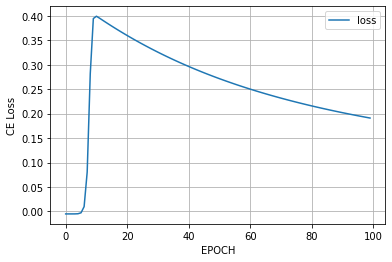

In [33]:
plt.plot(loss_list,label="loss")
plt.xlabel("EPOCH")
plt.ylabel("CE Loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

正答率がどのように上昇していくか可視化してみる

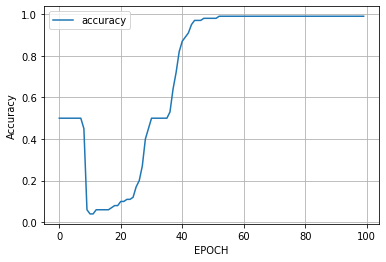

In [34]:
plt.plot(acc_list,label="accuracy")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

最後にデータを可視化したのち、直線を引いてみる

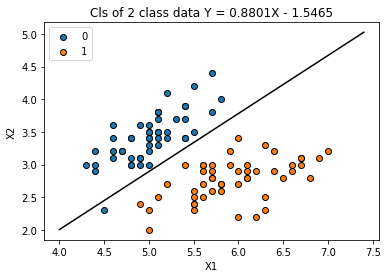

In [49]:
for label in np.unique(y):
  plt.scatter(x[y==label][:,0],x[y==label][:,1],label=label,edgecolors="k")
  plt.legend(loc="best")
  plt.xlabel("X1")
  plt.ylabel("X2")
X = np.arange(4.0,7.5,0.1)
W = np.array([0.88801256 ,-1.54650164])
Y = W[0]*X + W[1]
plt.plot(X,Y,c="black")
plt.title("Cls of 2 class data Y = 0.8801X - 1.5465")
plt.show()

## 3次元データの可視化

### 量子力学(理論)
もう一つのトピックとして3次元データの可視化を行ってみる。ただ単にirisデータを3次元データに落とし込みプロットするのは、少々つまらないので、irisデータ以外を扱いたいと思う。筆者は現在学部二年の専門科目で量子力学を勉強している。量子力学と聞くと、有名な方程式であるシュレディンガー方程式が登場する。

\begin{equation}
  H \psi(r,t) = i\hbar\frac{\partial\psi(r,t)}{\partial t} 
\end{equation}

\begin{equation}
  H = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial r^2} + V(x)
\end{equation}

これは量子力学で登場する有名な二階偏微分方程式である。この方程式を解析的に解く方法を学習したが、それは単原子のみに限った。今回はその解析解から波動方程式の絶対値の2乗である確率密度関数を3次元平面にプロットしてみることにする。

波動関数の解は3つの量子数で定義されている。 \
n : 主要量子数(電子軌道をきめる量) \
l : 方位量子数(軌道運動の角運動量の定義 0...n-1まで取る) \
m : 磁気量子数(磁気を決める量　-l,-l+1,...l-1,lまで取る)

### 実装

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from scipy.special import *
sph_harm(0,0,60,50)

(0.28209479177387814+0j)

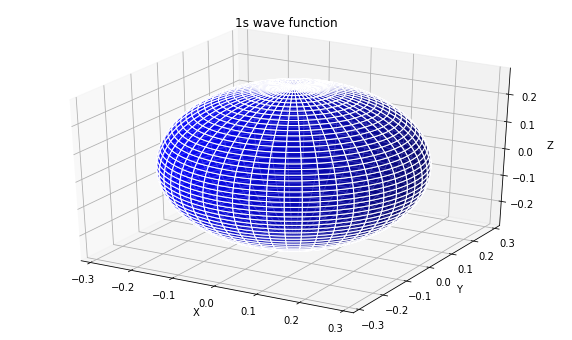

In [53]:
#今回は水素類似原子(n=1)の波動関数を計算する

#動径方向関数 Y_lm
#psi = R_nl*Y_lm 
def cordinate(m,l,theta,phi):
  r = np.abs(sph_harm(l,m,theta,phi))
  x = r*np.sin(theta)*np.cos(phi)
  y = r*np.sin(theta)*np.sin(phi)
  z = r*np.cos(theta)
  return x,y,z

n = 1
l = 0
m = 0
theta = np.linspace(0,np.pi,300)
phi = np.linspace(0,2*np.pi,300)

#格子点を生成する
tt,pp = np.meshgrid(theta,phi)

#n,l,m = 0,0,0 1s軌道関数
x,y,z = cordinate(l,m,tt,pp)

fig = plt.figure(figsize=(10,6))
ax.view_init(45, 45)
ax = fig.add_subplot(111,projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(str(n)+"s wave function")
ax.plot_surface(x,y,z,color="blue",edgecolor="white",alpha=0.8)

## 工夫点
1. 授業ではなんとなくの直線の傾きを求めたが、それを統計的な考えに基づき、分離直線を考える。コスト関数や勾配降下法などは線形回帰のみではなく、のちのち登場するニューラルネットワークにも応用される。
2. 量子力学をせっかく学んでいるのであれば、pythonで実装可能であれば、ぜひやってみたかった。今回、元素の中でも一番単純な水素原子をscipyライブラリーを使って計算した。

次回以降はplotlyを用いて上の操作を実装する予定。